### Will use Breast Cancer Wisconsin Datasets for decision trees

### Task1: load datasets

In [1]:
import pandas as pd 
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_att = pd.DataFrame(data=cancer.data,columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',  'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
cancer_categories= pd.DataFrame(data=cancer.target,columns=['diagnosis'])

In [3]:
print("The cancer dataset has {0[0]} samples and {0[1]} feature attributes.".format(cancer_att.shape))


The cancer dataset has 569 samples and 30 feature attributes.


In [4]:
cancer_categories_total = list(cancer_categories.shape)[0]
cancer_categories_count = list(cancer_categories['diagnosis'].value_counts())

print("The cancer dataset has {} diagnosis samples, among them {} are benign and {} are malignant.".format(cancer_categories_total, 
                                                                                 cancer_categories_count[0], 
                                                                                 cancer_categories_count[1]))

The cancer dataset has 569 diagnosis samples, among them 357 are benign and 212 are malignant.


### Task2: Create Datasets

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
x,y = shuffle(cancer_att,cancer_categories)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=4)

### Task3: (1) Use Decision Trees Model

In [6]:
from sklearn.tree import DecisionTreeClassifier;

tree = DecisionTreeClassifier(criterion    =  'entropy',
                              max_depth    =  3,
                              random_state =  0 );
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  0]
 [ 5 63]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       1.00      0.93      0.96        68

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Taks4: Create a decision tree graph

[Text(193.15384615384616, 190.26, 'worst radius <= 16.79\nentropy = 0.947\nsamples = 455\nvalue = [166, 289]'),
 Text(103.01538461538462, 135.9, 'worst concave points <= 0.136\nentropy = 0.396\nsamples = 307\nvalue = [24, 283]'),
 Text(51.50769230769231, 81.53999999999999, 'area error <= 38.605\nentropy = 0.11\nsamples = 274\nvalue = [4, 270]'),
 Text(25.753846153846155, 27.180000000000007, 'entropy = 0.064\nsamples = 263\nvalue = [2, 261]'),
 Text(77.26153846153846, 27.180000000000007, 'entropy = 0.684\nsamples = 11\nvalue = [2, 9]'),
 Text(154.52307692307693, 81.53999999999999, 'mean texture <= 19.71\nentropy = 0.967\nsamples = 33\nvalue = [20, 13]'),
 Text(128.76923076923077, 27.180000000000007, 'entropy = 0.934\nsamples = 20\nvalue = [7, 13]'),
 Text(180.27692307692308, 27.180000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(283.2923076923077, 135.9, 'mean concavity <= 0.062\nentropy = 0.245\nsamples = 148\nvalue = [142, 6]'),
 Text(257.53846153846155, 81.5399999

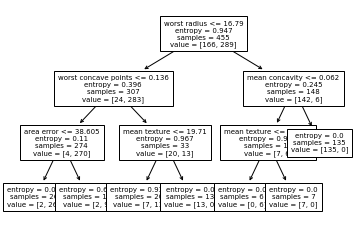

In [7]:
from sklearn.tree import plot_tree;

plot_tree(tree,
          feature_names = cancer.feature_names,
          fontsize      = 7 )

In [8]:
from sklearn.metrics import accuracy_score;
y_pred_train = tree.predict(x_train);
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
y_pred_test = tree.predict(x_test);
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))

Train Set Accuracy :  0.9758241758241758
Test Set Accuracy  :  0.9385964912280702


### Task3: (2) Use Random Forest Models

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
import numpy as np

clf_rf=RandomForestClassifier()
param_grid = {"n_estimators": np.arange(10,100,5),
              "min_samples_split": np.arange(2,100,2),
              "criterion": ["gini", "entropy"]
              }
grid_rf=GridSearchCV(clf_rf,param_grid,cv=10,scoring='accuracy')
print("Tuning Hyper-Parameters for accuracy")
grid_rf.fit(x_train,y_train)
print(grid_rf.best_params_)
print(np.round(grid_rf.best_score_,3))

Tuning Hyper-Parameters for accuracy
{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 20}
0.972
Accuracy_score:  0.9473684210526315


NameError: name 'classification_report' is not defined

In [14]:
from sklearn.metrics import accuracy_score,classification_report

prediction=grid_rf.predict(x_test)
print("Accuracy_score: ",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy_score:  0.9473684210526315
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        46
           1       0.98      0.93      0.95        68

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### Task3: (3) Use K Nearest Neighbors

In [24]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit (i.e. traing) the model
knn.fit(x_train, y_train)

# Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(x_test)

In [25]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.94      0.93      0.93        68

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



### Task5: Report the results 
have completed and included in each models' sections

### Task6: Final Report

Accuracy: Decision Tree > Random Forest > K-Nearest Neighbors